In [1]:
from graphviz import Graph, Digraph

In [7]:
def example(num):
    g = mygraph()
    if num == 1:
        g.node("A")
        g.edge("B", "C")
        g.edge("C", "D")
        g.edge("D", "B")
    elif num == 2:
        g.edge("A", "E")
        g.edge("A", "B")
        g.edge("B", "C")
        g.edge("C", "D")
        g.edge("D", "E")
    elif num == 3:
        g.edge("A", "B")
        g.edge("A", "C")
        g.edge("B", "D")
        g.edge("B", "E")
        g.edge("C", "F")
        g.edge("C", "G")
    elif num == 4:
        g.edge("A", "B")
        g.edge("A", "C")
        g.edge("B", "D")
        g.edge("B", "E")
        g.edge("C", "F")
        g.edge("C", "G")
        g.edge("E", "Z")
        g.edge("C", "Z")
        g.edge("B", "A")
    elif num == 5:
        width = 8
        height = 4
        for L1 in range(height-1):
            L2 = L1 + 1
            for i in range(width-(height-L1-1)):
                for j in range(width-(height-L2-1)):
                    node1 = str(L1)+"-"+str(i)
                    node2 = str(L2)+"-"+str(j)
                    g.edge(node1, node2)
    else:
        raise Exception("no such example")
    return g

In [19]:
class mygraph:
    def __init__(self):
        # name => Node
        self.nodes = {}
        self.visited = set()
    
    def node(self, name):
        self.nodes[name] = Node(self, name)
    
    def edge(self, src, dst):
        # automatically add missing nodes
        for name in [src, dst]:
            if not name in self.nodes:
                self.node(name)
        self.nodes[src].children.append(self.nodes[dst])
        
    def _repr_svg_(self):
        # draw nodes+edges, non-recursively!
        g = Digraph()
        for n in self.nodes:
            g.node(n)
            for child in self.nodes[n].children:
                g.edge(n, child.name)
        return g._repr_svg_()
    
    def find(self, src, dst):
        self.visited = set()
        start_node =self.nodes[src]
        return start_node.find(dst)

class Node:
    def __init__(self, graph, name):
        self.graph = graph # back reference
        self.name = name
        self.children = []
        
    def find(self, dst):
        if self.name in self.graph.visited:
            return  None
        self.graph.visited.add(self.name)
        
        print(self.name)
        if self.name == dst:
            return (self.name, )
        # Todo: other checks
        for child in self.children:
            childpath = child.find(dst)
            if childpath != None:
                return  (self.name,) + childpath
        return None

g = example(1)
g.find("B", "A")
print(g.find("B", "A"))
print(g.find("B", "D"))

B
C
D
B
C
D
None
B
C
D
('B', 'C', 'D')


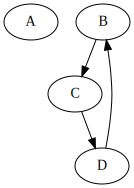

In [15]:
g

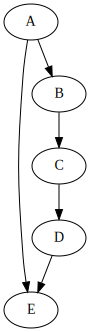

In [24]:
g = example(2)
g

In [25]:
g.find("A", "E")
print(g.find("A", "E"))

A
E
A
E
('A', 'E')


In [32]:
class mygraph:
    def __init__(self):
        # name => Node
        self.nodes = {}
        self.visited = set()
    
    def node(self, name):
        self.nodes[name] = Node(self, name)
    
    def edge(self, src, dst):
        # automatically add missing nodes
        for name in [src, dst]:
            if not name in self.nodes:
                self.node(name)
        self.nodes[src].children.append(self.nodes[dst])
        
    def _repr_svg_(self):
        # draw nodes+edges, non-recursively!
        g = Digraph()
        for n in self.nodes:
            g.node(n)
            for child in self.nodes[n].children:
                g.edge(n, child.name)
        return g._repr_svg_()
    
    def find(self, src, dst):
        self.visited = set()
        start_node =self.nodes[src]
        return start_node.find(dst)

class Node:
    def __init__(self, graph, name):
        self.graph = graph # back reference
        self.name = name
        self.children = []
    def __repr__(self):
        return self.name
    
    def backtrace(self):
        path =[]
        node = self
        while node!=None:
            path.append[node]
            node = node.prev
        return list(reversed(path))
    
    def find(self, dst):
        added = set()
        self.prev = None
        todo = [self]#work from the beginingof the list
        added.add(self.name)
        
        while len(todo):
            
            node = todo.pop(0)
            
            if node.name == dst:
                return node.backtrace
            
            for child in node.children:
                if  not child.name in added:
                    child.prev =self
                    todo.append(child)
                    added.add(child.name)
        return None
g = example(3)
g.find("A", "C")

<bound method Node.backtrace of C>

In [35]:
g = example(5)

In [36]:
g.find("0-1", "3-5")

<bound method Node.backtrace of 3-5>

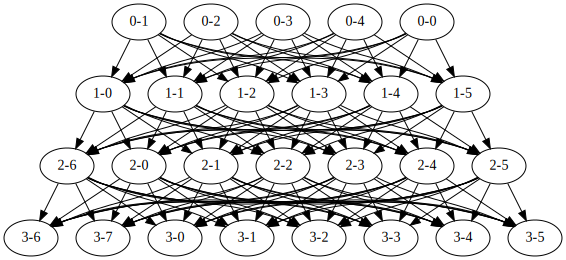

In [37]:
g